### Step 1: Design Your Grid World

Let's design a 5x5 grid world with the following elements:

'S' - Start position

'G' - Goal position

'#' - Obstacle

'O' - Open path

### Step 2: Define States, Actions, and Rewards

States: Each cell in the grid represents a state. We can represent states as coordinates (row, column).

Actions: The agent can take four actions: move up, move down, move left, and move right.

Rewards: Define rewards for different situations:

Reaching the goal: +10

Hitting an obstacle: -10

Moving to an open cell: -1

### Step 3: Implement Q-Learning Algorithm

In [11]:
# Importing required libraries

import numpy as np

In [19]:
# The grid world and rewards

grid_world = np.array([['S', '-', '-', '-', '-'],
                       ['-', '#', '-', '-', 'G'],
                       ['-', 'O', '-', '#', '-'],
                       ['-', '#', '-', 'O', '-'],
                       ['-', '-', 'O', 'O', 'O']])

In [13]:
# Actions (up, down, left, right)

actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

In [22]:
# Define rewards
rewards = {'G': 10,   # Goal
           '#': -10,  # Obstacle added
           'O': -1,   # Here is the Open path
           '-': -1,    # This represents the Empty cell (not used)
           'S': 0}    # Start (no immediate reward)


In [23]:
# Initialize the Q-table with zeros

num_rows, num_cols = grid_world.shape
num_actions = len(actions)
q_table = np.zeros((num_rows, num_cols, num_actions))

In [24]:
# Hyperparameters

learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 1000

In [27]:
# Q-learning algorithm
for episode in range(num_episodes):
    state = (0, 0)  # Starting state
    done = False

    while not done:
        # Choose an action using epsilon-greedy strategy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(q_table[state[0], state[1]])

        # Calculate the next state
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])

        # Check if the next state is within the grid boundaries
        if 0 <= next_state[0] < num_rows and 0 <= next_state[1] < num_cols:
            # Observe the reward based on the next state
            reward = rewards[grid_world[next_state[0], next_state[1]]]

            # Update the Q-value using the Q-learning formula
            q_table[state[0], state[1], action] += learning_rate * (
                reward + discount_factor * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])

            # Update the current state
            state = next_state

            # Check if the goal is reached
            if grid_world[state[0], state[1]] == 'G':
                done = True

# Print the learned Q-table
print("Learned Q-table:")
print(q_table)

Learned Q-table:
[[[-1.00000000e-01  1.11488085e+00  0.00000000e+00  3.12200000e+00]
  [ 0.00000000e+00 -4.58884963e+00  2.59210562e+00  4.58000000e+00]
  [ 0.00000000e+00  6.20000000e+00  2.64379938e+00  5.12660138e+00]
  [ 0.00000000e+00  7.97122490e+00 -1.00000000e-01 -1.70832066e-01]
  [ 0.00000000e+00  0.00000000e+00  4.45358643e-01  0.00000000e+00]]

 [[ 2.71628994e+00  0.00000000e+00  0.00000000e+00 -1.98400975e+00]
  [ 2.69000000e-03 -2.80000000e-01 -1.03845169e-01  6.19703733e+00]
  [ 4.19634776e+00  2.58910270e+00 -4.42530420e+00  8.00000000e+00]
  [ 5.54864010e+00 -3.38073434e+00  5.69062419e+00  1.00000000e+01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-1.90000000e-01 -1.00000000e-01  0.00000000e+00 -1.09000000e-01]
  [-1.00000000e+00 -1.00000000e+00 -1.90000000e-01  2.51258224e-01]
  [ 5.57958634e+00 -3.26539428e-01 -1.00000000e-01 -1.22909762e+00]
  [ 7.81790604e+00  0.00000000e+00  3.63439162e-01 -1.00000000e-01]
  [ 1.90000000e+00  0.00000

### Observation--

1. The Q-table is a 5x5x4 array used for Q-learning.
2. Its first dimension (5x5) represents grid states.
3. The second dimension (4) represents possible actions (up, down, left, right).
4. Q-values in the table predict cumulative rewards.
5. Q-learning updates Q-values to find the best actions.
6. The highest Q-value in a state guides optimal actions.

### Step 4: Visualize the Optimal Path

Let's use the learned Q-table to make decisions on the grid world. Starting from the 'S' state, follow the action that leads to the maximum Q-value at each step until reaching the 'G' state.

In [28]:
def visualize_optimal_path(q_table):
    start = (0, 0)
    goal = (1, 4)
    path = [start]

    while path[-1] != goal:
        current_state = path[-1]
        action = np.argmax(q_table[current_state[0], current_state[1]])
        next_state = (
            current_state[0] + actions[action][0], current_state[1] + actions[action][1]
        )
        path.append(next_state)

    # Visualize the path on the grid world
    grid_with_path = np.copy(grid_world)
    for state in path:
        grid_with_path[state[0], state[1]] = 'X'  # Mark the path with 'X'

    print("Optimal Path:")
    print(grid_with_path)

# Call the function to visualize the optimal path
visualize_optimal_path(q_table)


Optimal Path:
[['X' 'X' 'X' '-' '-']
 ['-' '#' 'X' 'X' 'X']
 ['-' 'O' '-' '#' '-']
 ['-' '#' '-' 'O' '-']
 ['-' '-' 'O' 'O' 'O']]


### Insights --

1. It starts from the "start" position (0, 0).
2. It follows the action with the highest Q-value at each step.
3. It stops when it reaches the "goal" position (1, 4).
4. It marks the path with 'X' on the grid to visualize it.

#### More advanced visualization for Understanding the results better--

In [31]:
# Lists to store data for visualization
episode_numbers = []
cumulative_steps = []
sum_squared_errors = []
intermediate_q_tables = []

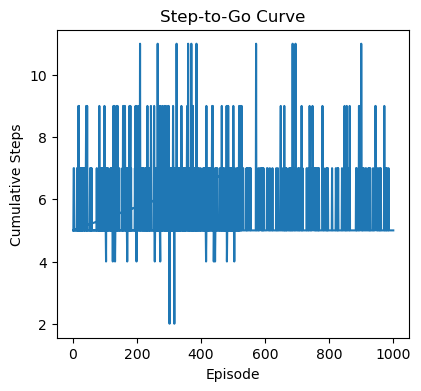

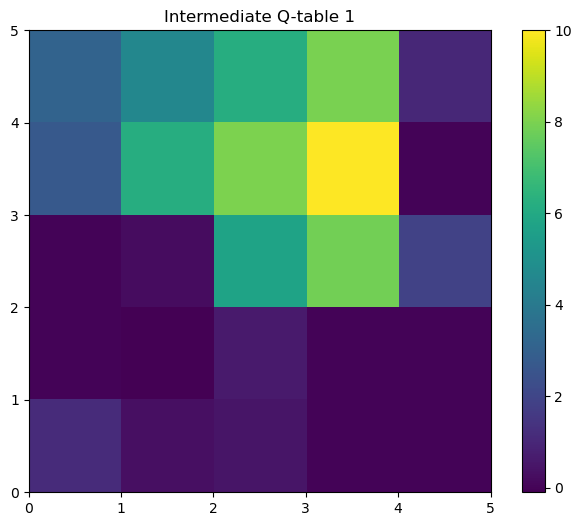

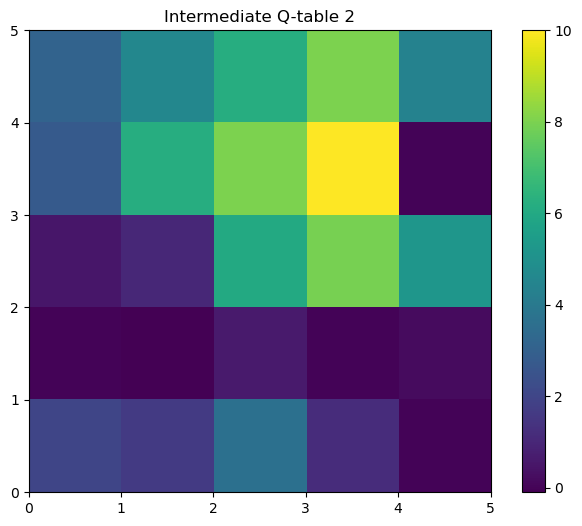

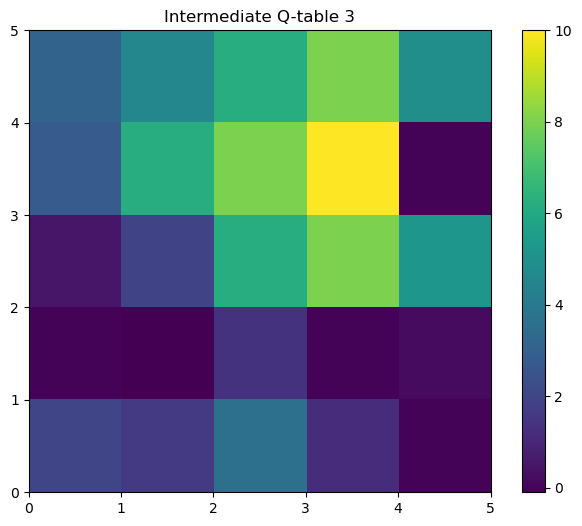

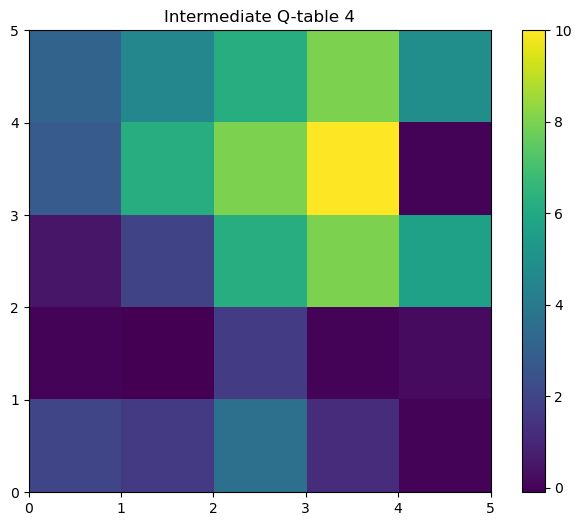

<Figure size 640x480 with 0 Axes>

In [34]:
# Training loop
for episode in range(num_episodes):
    state = (0, 0)  # Starting state
    done = False
    path = [state]
    
    while not done:
        # Choose an action using epsilon-greedy strategy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(q_table[state[0], state[1]])
        
        # Calculate the next state based on the chosen action
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        
        # Check if the next state is within the grid boundaries
        if 0 <= next_state[0] < num_rows and 0 <= next_state[1] < num_cols:
            # Perform the action and observe the next state and reward
            reward = rewards[grid_world[next_state[0], next_state[1]]]
            
            # Update the Q-value using the Q-learning formula
            q_table[state[0], state[1], action] += learning_rate * (
                reward + discount_factor * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
            
            # Update the current state
            state = next_state
            path.append(state)
            
            # Check if the goal is reached
            if grid_world[state[0], state[1]] == 'G':
                done = True
        else:
            # Action would move the agent out of bounds; consider taking another action
            pass
    
    # Collect data for visualization
    episode_numbers.append(episode + 1)  # Episode numbers start from 1
    cumulative_steps.append(len(path) - 1)  # Subtract 1 to exclude the initial state
    
    # Store intermediate Q-tables at selected episodes
    if episode in [100, 500, 1000]:  # Customize the episodes you want to save
        intermediate_q_tables.append(np.copy(q_table))

# Plot the Step-to-Go Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(episode_numbers, cumulative_steps)
plt.xlabel('Episode')
plt.ylabel('Cumulative Steps')
plt.title('Step-to-Go Curve')

# Visualize intermediate Q-tables (if desired)
for i, q_table in enumerate(intermediate_q_tables):
    plt.figure(figsize=(8, 6))
    plt.imshow(np.max(q_table, axis=2), cmap='viridis', origin='upper', extent=(0, num_cols, 0, num_rows))
    plt.colorbar()
    plt.title(f'Intermediate Q-table {i + 1}')
    plt.show()

plt.tight_layout()
plt.show()